# IMPORTING PACKAGES 

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import skew
import math as mth
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from math import sqrt


In [2]:
###IMPORTING THE DATASET

In [3]:
train =pd.read_csv('F:/r file/project/Big Mart sale/train.csv')
test=pd.read_csv('F:/r file/project/Big Mart sale/test.csv') 

In [4]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [5]:
train.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
#### VIEWING THE DATA TYPES

train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [8]:
#### COMBINING THE TRAIN AND TEST TO MAKE MASTER

master=pd.concat([train,test],axis=0)

In [9]:
master.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
master.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5679,FDJ26,15.3,Regular,0.00000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
5680,FDU37,9.5,Regular,0.10472,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [11]:
### check duplicate values 

master.duplicated().sum()

0

In [12]:
#### check for NAN values
master.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [13]:
master[master['Item_Weight'].isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [14]:
master[master['Item_Identifier']=='FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464
3373,FDP10,19.0,Low Fat,0.128612,Snack Foods,104.1622,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
3848,FDP10,19.0,Low Fat,0.214397,Snack Foods,105.8622,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
4804,FDP10,NaN,Low Fat,0.224269,Snack Foods,104.4622,OUT019,1985,Small,Tier 1,Grocery Store,NaN


In [15]:
master[master['Item_Identifier']=='NCZ30']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1224,NCZ30,6.59,Low Fat,0.043828,Household,121.4098,OUT010,1998,NaN,Tier 3,Grocery Store,241.0196
2428,NCZ30,6.59,Low Fat,0.026163,Household,121.5098,OUT013,1987,High,Tier 3,Supermarket Type1,602.5490
3220,NCZ30,6.59,Low Fat,0.026180,Household,120.7098,OUT035,2004,Small,Tier 2,Supermarket Type1,2530.7058
3739,NCZ30,6.59,Low Fat,0.000000,Household,119.1098,OUT017,2007,NaN,Tier 2,Supermarket Type1,964.0784
4418,NCZ30,6.59,Low Fat,0.026226,Household,119.0098,OUT049,1999,Medium,Tier 1,Supermarket Type1,2530.7058
4523,NCZ30,NaN,LF,0.026058,Household,121.9098,OUT027,1985,Medium,Tier 3,Supermarket Type3,3374.2744
7068,NCZ30,6.59,Low Fat,0.026238,Household,121.6098,OUT045,2002,NaN,Tier 2,Supermarket Type1,2410.1960
365,NCZ30,6.59,Low Fat,0.026292,Household,121.7098,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
903,NCZ30,NaN,Low Fat,0.045847,Household,120.8098,OUT019,1985,Small,Tier 1,Grocery Store,NaN
3978,NCZ30,6.59,Low Fat,0.026185,Household,122.3098,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN


In [16]:
### since pattern found every item_identifier has unique weight with itself



In [17]:
group_data=master.groupby(['Item_Identifier'])['Item_Weight'].max().reset_index()

In [18]:
group_data.tail()

,Item_Identifier,Item_Weight
1554,NCZ30,6.59
1555,NCZ41,19.85
1556,NCZ42,10.50
1557,NCZ53,9.60
1558,NCZ54,14.65


In [19]:
master['Item_weight_null_value']=master['Item_Weight'].isnull().astype(int)
master['Item_weight_null_value'].head()

Item_nullval=master[master['Item_weight_null_value']==1]

print(Item_nullval)


group_data1=master.groupby(['Item_Identifier'])['Item_Weight'].max().reset_index()

print(group_data1)

for index,row in group_data1.iterrows():
    item_weight=row['Item_Weight']
    item_identifier=row['Item_Identifier']
    master.loc[(master['Item_weight_null_value']==1)&(master['Item_Identifier']==item_identifier),'Item_Weight']=item_weight


     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
5655           FDX32          NaN          Regular         0.099375   
5656           FDC39          NaN          Low Fat         0.158425   
5661           DRG37          NaN          Low Fat         0.000000   
5665           DRE03          NaN          Low Fat         0.024110   
5669           FDN31          NaN          Low Fat         0.072529   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  

In [20]:
### LETS DROP ITEM_WEIGHT_NULL
master.drop(['Item_weight_null_value'],axis=1,inplace=True)

In [21]:
#### Item_fat content 

master['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [22]:
master.replace({'Item_Fat_Content':{'LF':'Low Fat'}},inplace=True)
master.replace({'Item_Fat_Content':{'low fat':'Low Fat'}},inplace=True)
master.replace({'Item_Fat_Content':{'Regular':'reg'}},inplace=True)


In [23]:
master['Item_Fat_Content'].value_counts()

Low Fat    9185
reg        5019
Name: Item_Fat_Content, dtype: int64

In [24]:
##### OUTLET_SIZE NULL & item_identifier is no more important ,lets drop it

master[master['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,reg,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,reg,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,reg,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
5668,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
5670,FDO03,10.395,reg,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.300,reg,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [25]:
master['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [26]:
master['Outlet_Size'].isnull().mean()

0.28273725711067305

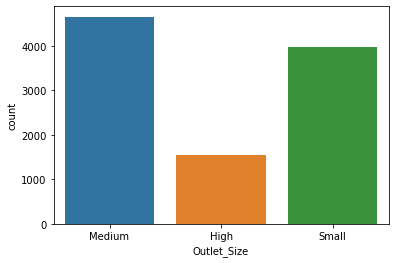

In [27]:
sns.countplot(master['Outlet_Size'])

In [28]:
### After finding there is no pattern found in that so just replace it by Medium

master['Outlet_Size'].fillna('Medium',inplace=True)

In [29]:
master.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [30]:
cat=[]
for i in master.columns:
    if(master[i].dtypes=='object'):
        cat.append(i)
        

In [31]:
cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

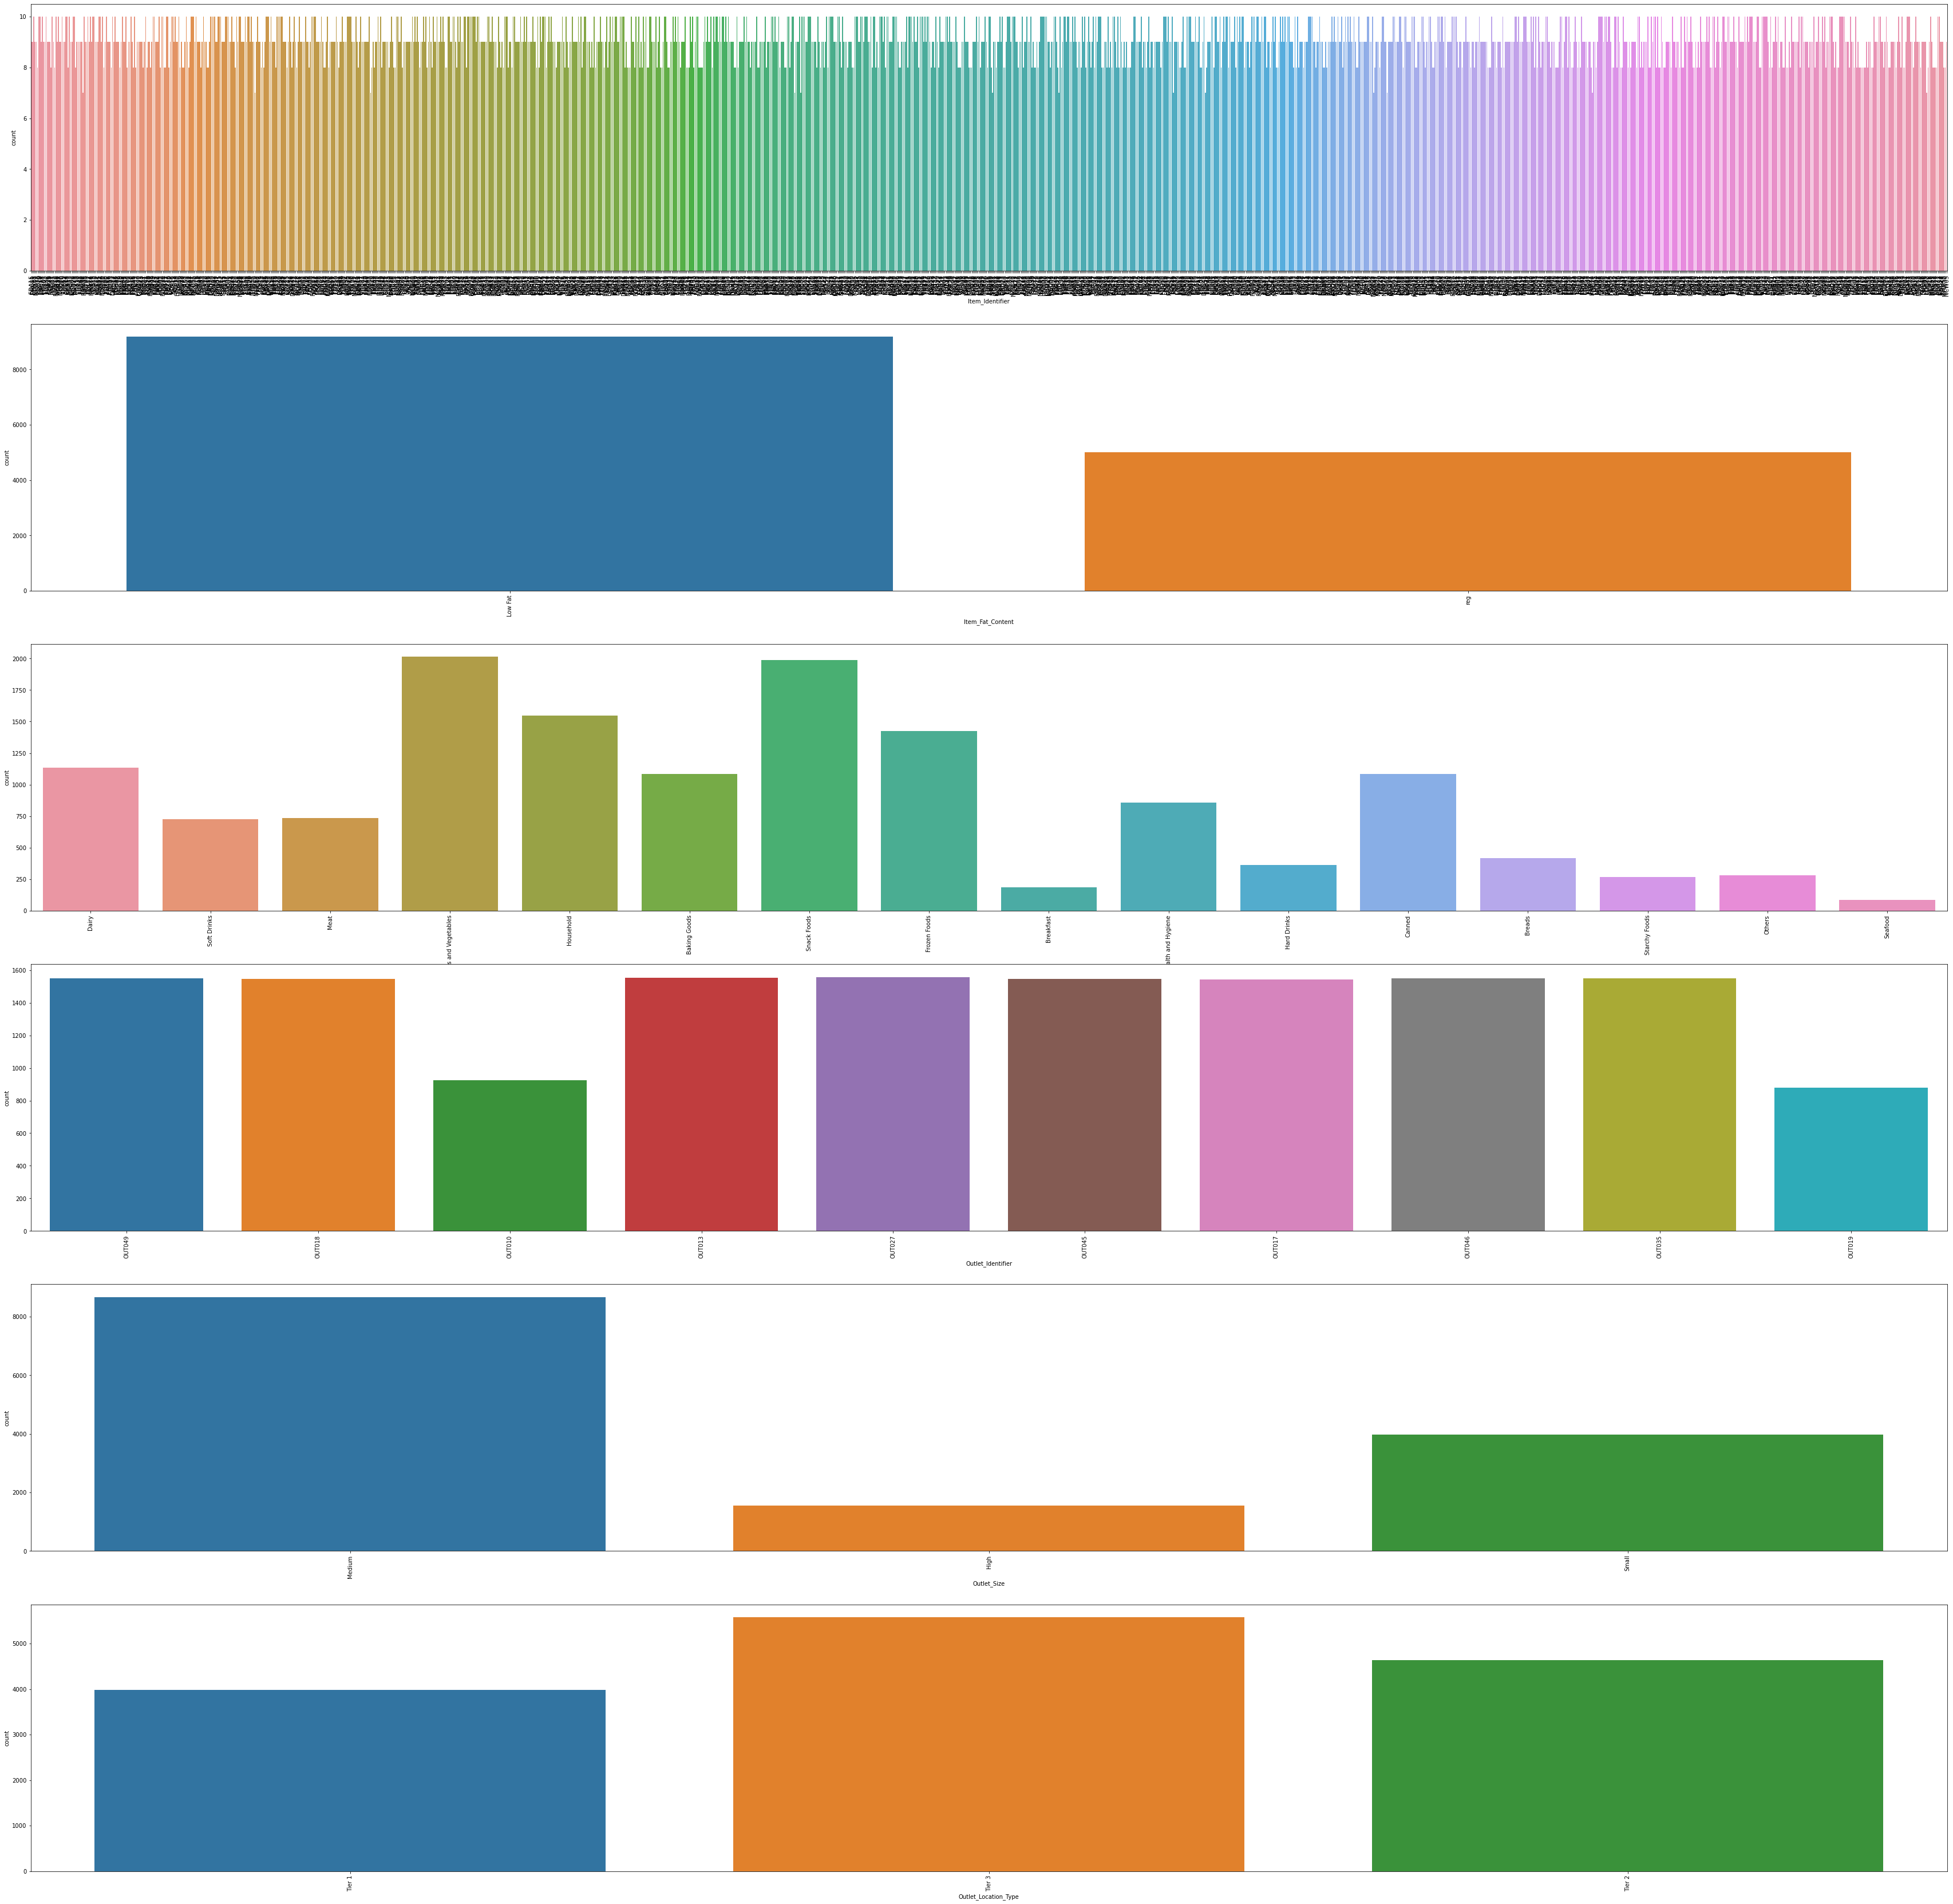

In [32]:
fig, ax=plt.subplots(6,1,figsize=(60,60))
for variable,subplot in zip(cat,ax.flatten()):
    sns.countplot(master[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [33]:
con=[]
for i in master.columns:
    if(master[i].dtypes!='object'):
        con.append(i)

In [34]:
con

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

C:\Users\Aman saini\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Aman saini\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


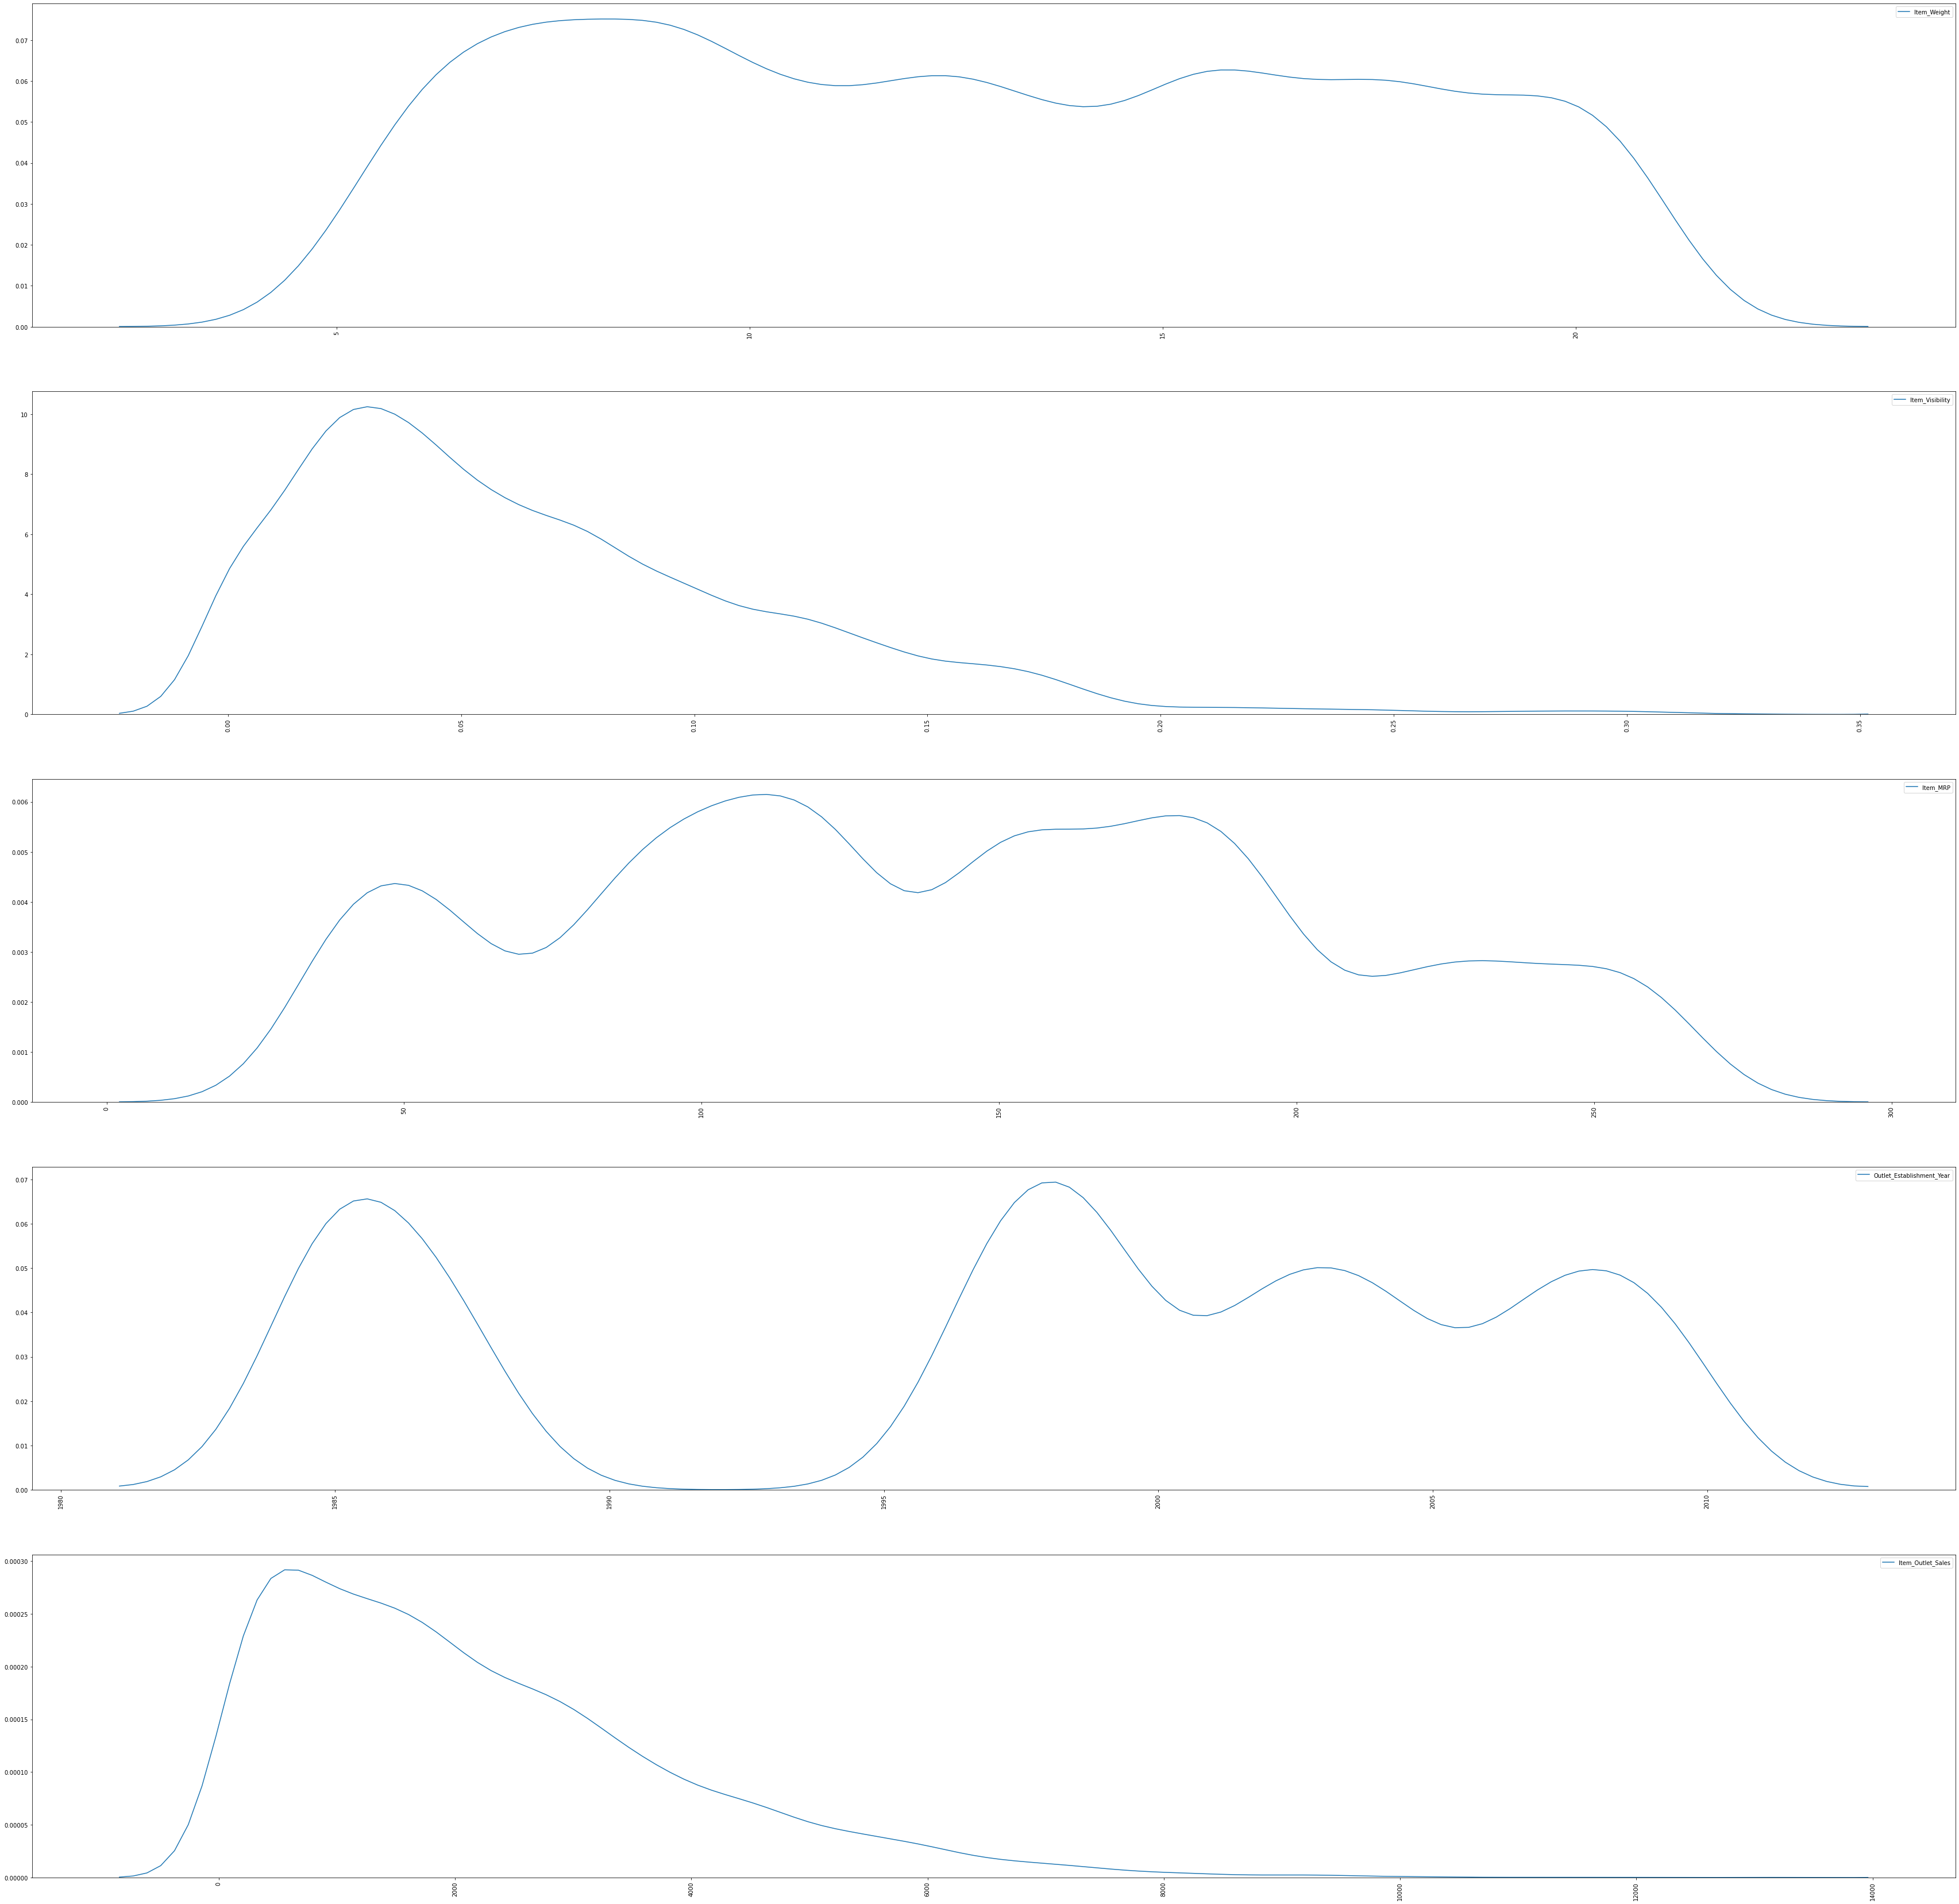

In [35]:
fig, ax=plt.subplots(5,1,figsize=(60,60))
for variable,subplot in zip(con,ax.flatten()):
    sns.kdeplot(master[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [36]:
mtr=master.copy()

In [37]:
mtr.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [38]:
### OUR INDEPENDENT VARIABLE HIGHLY POSITIVELY SKEWED


In [39]:
master.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [40]:
tran=['Item_Weight','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

for i in tran:
    mtr[i]=np.log(mtr[i])

In [41]:
mtr.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,2.475518,0.065953,4.829389,7.599808,7.296540
std,0.395219,0.051459,0.523191,0.004194,1.017108
min,1.516226,0.000000,3.443299,7.593374,3.505257
25%,2.164472,0.027036,4.543422,7.594381,6.726530
50%,2.533697,0.054021,4.957565,7.600402,7.492388
75%,2.818398,0.094037,5.224970,7.602900,8.039575
max,3.061052,0.328391,5.586831,7.605392,9.479372


In [42]:
mtr.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [43]:
mtr['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [44]:
#### LETS SPLIT back to training and testing
mtr['check']=mtr['Item_Outlet_Sales'].isnull().astype(int)

In [45]:
mtr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,check
0,FDA15,2.230014,Low Fat,0.016047,Dairy,5.520697,OUT049,7.600402,Medium,Tier 1,Supermarket Type1,8.225540,0
1,DRC01,1.778336,reg,0.019278,Soft Drinks,3.876794,OUT018,7.605392,Medium,Tier 3,Supermarket Type2,6.094524,0
2,FDN15,2.862201,Low Fat,0.016760,Meat,4.953133,OUT049,7.600402,Medium,Tier 1,Supermarket Type1,7.648392,0
3,FDX07,2.954910,reg,0.000000,Fruits and Vegetables,5.204529,OUT010,7.599902,Medium,Tier 3,Grocery Store,6.596300,0
4,NCD19,2.189416,Low Fat,0.000000,Household,3.986414,OUT013,7.594381,High,Tier 3,Supermarket Type1,6.902446,0


In [46]:
trs=mtr[mtr['check']==0]
tst=mtr[mtr['check']==1]

In [47]:
mtr.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,check
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,2.475518,0.065953,4.829389,7.599808,7.296540,0.399958
std,0.395219,0.051459,0.523191,0.004194,1.017108,0.489907
min,1.516226,0.000000,3.443299,7.593374,3.505257,0.000000
25%,2.164472,0.027036,4.543422,7.594381,6.726530,0.000000
50%,2.533697,0.054021,4.957565,7.600402,7.492388,0.000000
75%,2.818398,0.094037,5.224970,7.602900,8.039575,1.000000
max,3.061052,0.328391,5.586831,7.605392,9.479372,1.000000


In [48]:
sample_submission=pd.DataFrame()

In [49]:
sample_submission['Item_Identifier']=tst['Item_Identifier']
sample_submission['Outlet_Identifier']=tst['Outlet_Identifier']

In [50]:
## NOW LETS DROP Item_Identifier ,Outlet_Identifier
trs.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
tst.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


C:\Users\Aman saini\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
tst.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [52]:
mtr.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,check
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,2.475518,0.065953,4.829389,7.599808,7.296540,0.399958
std,0.395219,0.051459,0.523191,0.004194,1.017108,0.489907
min,1.516226,0.000000,3.443299,7.593374,3.505257,0.000000
25%,2.164472,0.027036,4.543422,7.594381,6.726530,0.000000
50%,2.533697,0.054021,4.957565,7.600402,7.492388,0.000000
75%,2.818398,0.094037,5.224970,7.602900,8.039575,1.000000
max,3.061052,0.328391,5.586831,7.605392,9.479372,1.000000


In [53]:
##### MIN & MAX SCALING
c=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
for col in c:
    if (trs[col].dtypes!='object'):
        mms = MinMaxScaler() 
        trs[col] = mms.fit_transform(trs[[col]])
        tst[col] = mms.transform(tst[[col]])
            

C:\Users\Aman saini\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Aman saini\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Aman saini\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [54]:
trs.drop(['check'],axis=1,inplace=True)
tst.drop(['check'],axis=1,inplace=True)

C:\Users\Aman saini\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
trs.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.462051,Low Fat,0.048866,Dairy,0.969148,0.584793,Medium,Tier 1,Supermarket Type1,8.225540
1,0.169670,reg,0.058705,Soft Drinks,0.202234,1.000000,Medium,Tier 3,Supermarket Type2,6.094524
2,0.871279,Low Fat,0.051037,Meat,0.704368,0.584793,Medium,Tier 1,Supermarket Type1,7.648392
3,0.931292,reg,0.000000,Fruits and Vegetables,0.821649,0.543158,Medium,Tier 3,Grocery Store,6.596300
4,0.435771,Low Fat,0.000000,Household,0.253374,0.083794,High,Tier 3,Supermarket Type1,6.902446


In [56]:
##### creating dummy variables

In [57]:
nt=[]
for i in trs.columns:
    if(trs[i].dtypes=='object'):
        nt.append(i)

In [58]:
pt=[]
for i in tst.columns:
    if(tst[i].dtypes=='object'):
        pt.append(i)


In [59]:
nt,pt

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Fat_Content',
  'Item_Type',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'])

In [60]:
cols=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
trs = pd.get_dummies(trs,columns=cols,drop_first=True)
tst = pd.get_dummies(tst,columns=cols,drop_first=True)


In [61]:
trs.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_reg', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [62]:
tst.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_reg', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

### TRAIN TEST SPLIT FOR MAKING A MODEL

In [63]:
x=trs.drop(['Item_Outlet_Sales'],axis=1)
y=trs['Item_Outlet_Sales']



x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [64]:
y_test.tail(2)

401     6.054702
7293    5.184221
Name: Item_Outlet_Sales, dtype: float64

# MODEL BUILDING


In [65]:
## DECLARE THE MODEL

linearreg=LinearRegression()

In [66]:
linearreg.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred=linearreg.predict(x_train)

In [68]:
y_pred

array([5.97571148, 7.47948469, 7.53157468, ..., 7.3731267 , 7.31023871,
       7.43151965])

In [74]:
y_tpred=linearreg.predict(x_test)

In [77]:
y_tpred

array([7.54354656, 7.3828459 , 5.91691809, ..., 7.50534884, 7.08310504,
       5.18658322])

In [69]:
y_train

913     6.382206
3334    6.924949
2476    7.754609
5502    8.269139
3291    7.926745
          ...   
278     6.215970
3714    8.575418
7409    7.947438
3325    6.906454
5787    8.260226
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [78]:
#### ACCURACY FOR TRAINING

print('Accuracy:',metrics.r2_score(y_train,y_pred))


#### ACCURACY FOR TEST

print('Accuracy:',metrics.r2_score(y_test,y_tpred))

Accuracy: 0.7390971208070364
Accuracy: 0.7519948955346769


In [82]:
#### ROOT MEAN SQUARE ERROR
#calculate rmse

error1 = sqrt(mean_squared_error(y_test,y_tpred))
error1

0.513182140135064

# RIDGE REGRESSION

In [135]:
####LASSO AND REG REGRESSION

ridge_reg=Ridge(alpha=100,max_iter=8500,solver='saga',random_state=121)

In [136]:
ridge_reg.fit(x_train,y_train)

Ridge(alpha=100, max_iter=8500, random_state=121, solver='saga')

In [138]:
#### RIDGE INTERCEPT
print('cofficient:',ridge_reg.coef_)
print('Intercept:',ridge_reg.intercept_)

cofficient: [-6.28202523e-03 -2.11445977e-01  1.75641775e+00  2.04383392e-01
  1.92593292e-02  4.82067492e-02 -8.13085492e-03  3.22617334e-02
 -1.46817816e-03 -2.72488223e-02  1.55351189e-02 -1.07163202e-02
  5.00985312e-03  1.33173644e-02  1.82270400e-02 -5.62333296e-03
  7.45800278e-03  2.27214565e-02 -1.51476124e-02  1.58961266e-02
 -1.00691796e-02 -7.07623278e-02  1.00321978e-02  7.86482017e-02
  1.37125616e+00  9.26733357e-01  1.73496120e+00]
Intercept: 4.884116085342215


In [139]:
ridgetrn_pred=ridge_reg.predict(x_train)

In [140]:
ridgetrn_pred

array([6.44600808, 7.48273283, 7.41583598, ..., 7.46075136, 7.29824191,
       7.41582295])

In [141]:
y_train

913     6.382206
3334    6.924949
2476    7.754609
5502    8.269139
3291    7.926745
          ...   
278     6.215970
3714    8.575418
7409    7.947438
3325    6.906454
5787    8.260226
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [143]:
ridgetst_pred=ridge_reg.predict(x_test)

In [144]:
#### ACCURACY FOR TRAINING

print('Accuracy:',metrics.r2_score(y_train,ridgetrn_pred))


#### ACCURACY FOR TEST

print('Accuracy:',metrics.r2_score(y_test,ridgetst_pred))

Accuracy: 0.6874440556453938
Accuracy: 0.7002481293366702


In [145]:
#### ROOT MEAN SQUARE ERROR
#calculate rmse

error1 , error2 = sqrt(mean_squared_error(y_train,ridgetrn_pred)) , sqrt(mean_squared_error(y_test,ridgetst_pred))

print(error1 , error2)
  

0.5667042970347234 0.5641858306692219


In [146]:
sample_submission['Item_Outlet_Sales']=np.exp(ridge_reg.predict(tst))

In [151]:
sample_submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1620.625072
1,FDW14,OUT017,1442.776605
2,NCN55,OUT010,784.151919
3,FDQ58,OUT017,2356.649313
4,FDY38,OUT027,3920.986099
...,...,...,...
5676,FDB58,OUT046,1905.337332
5677,FDD47,OUT018,1648.339707
5678,NCO17,OUT045,1715.814849
5679,FDJ26,OUT017,3188.163546


In [152]:
### final submission on ridge regression

sample_submission.to_csv('rf_submission.csv')